In [ ]:
import pandas as pd
titanic = pd.read_csv('/content/titanic_dataset new.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.set_index('PassengerId', inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:

missing_values = titanic.isnull().sum()
print("Missing values before filling:\n", missing_values)


titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Cabin'].fillna('Unknown', inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


missing_values_after = titanic.isnull().sum()
print("Missing values after filling:\n", missing_values_after)

Missing values before filling:
 Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Missing values after filling:
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


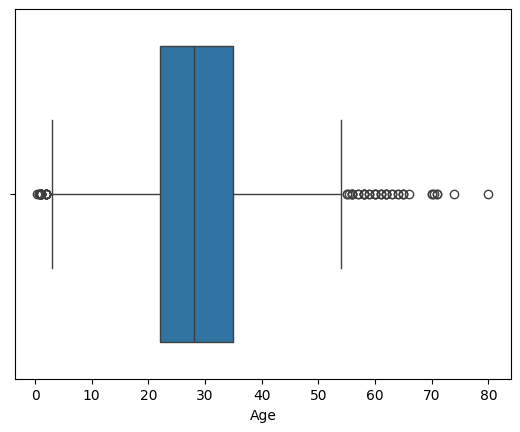

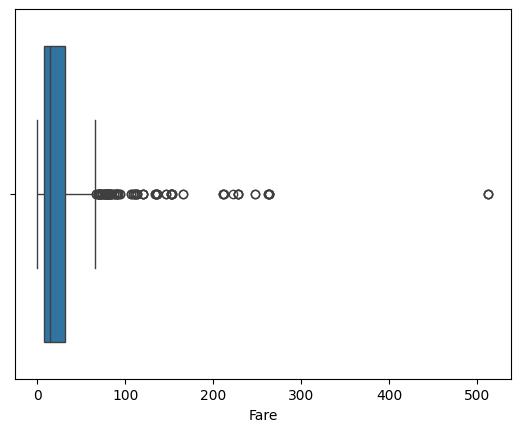

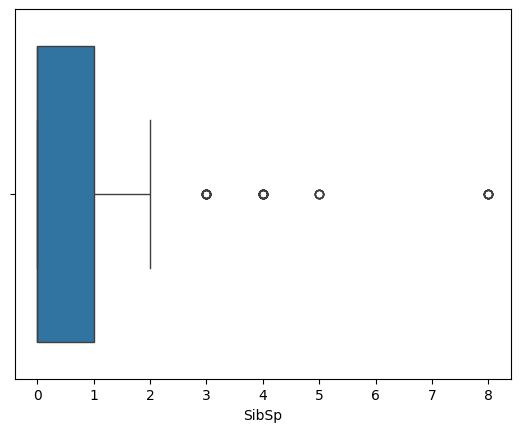

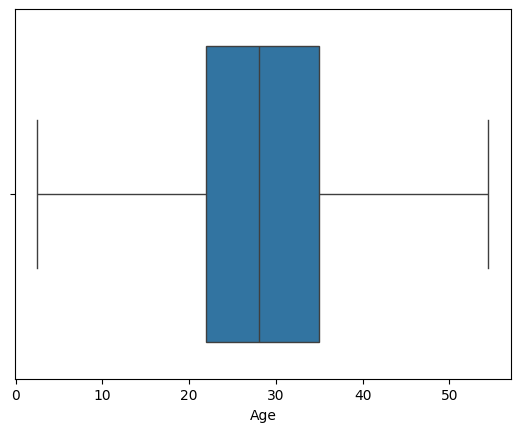

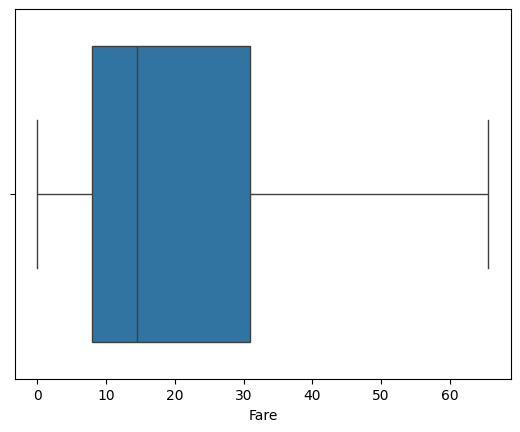

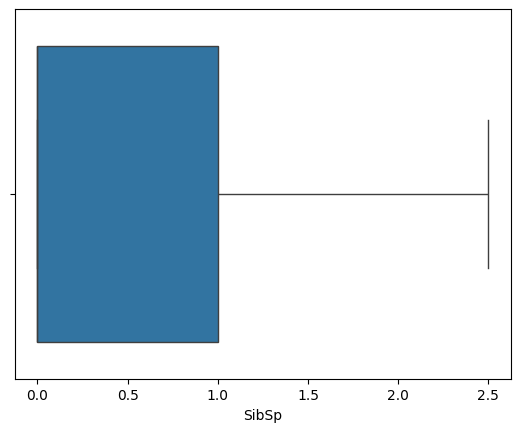

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Checking outliers using boxplot for 'Age', 'Fare', and 'SibSp'
sns.boxplot(x=titanic['Age'])
plt.show()

sns.boxplot(x=titanic['Fare'])
plt.show()

sns.boxplot(x=titanic['SibSp'])
plt.show()

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    series = np.where(series < lower_bound, lower_bound, series)
    series = np.where(series > upper_bound, upper_bound, series)
    return series

titanic['Age'] = cap_outliers(titanic['Age'])
titanic['Fare'] = cap_outliers(titanic['Fare'])
titanic['SibSp'] = cap_outliers(titanic['SibSp'])

sns.boxplot(x=titanic['Age'])
plt.show()

sns.boxplot(x=titanic['Fare'])
plt.show()

sns.boxplot(x=titanic['SibSp'])
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler


features = titanic.drop(columns=['Survived'])
target = titanic['Survived']


scaler = MinMaxScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features.select_dtypes(include=[np.number])), columns=features.select_dtypes(include=[np.number]).columns)


features_scaled = pd.concat([features_scaled, features.select_dtypes(exclude=[np.number]).reset_index(drop=True)], axis=1)


features_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1.0,0.375000,0.4,0.0,0.110460,"Braund, Mr. Owen Harris",male,A/5 21171,Unknown,S
1,0.0,0.682692,0.4,0.0,1.000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1.0,0.451923,0.0,0.0,0.120745,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Unknown,S
3,0.0,0.625000,0.4,0.0,0.809027,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,1.0,0.625000,0.0,0.0,0.122649,"Allen, Mr. William Henry",male,373450,Unknown,S
